In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = load_wine(as_frame=True)
X = wine.data          # features (13 chemical properties)
y = wine.target        # class labels (0, 1, 2)
feature_names = wine.feature_names
target_names = wine.target_names

In [5]:
df = X.copy()


In [6]:
df.head()   

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df.shape

(178, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
df.shape

(178, 13)

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # returns a NumPy array

print("\nScaled shape:", X_scaled.shape)
print("Mean of each scaled feature (approx):", X_scaled.mean(axis=0)[:5])
print("Std of each scaled feature (approx):", X_scaled.std(axis=0)[:5])


Scaled shape: (178, 13)
Mean of each scaled feature (approx): [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17]
Std of each scaled feature (approx): [1. 1. 1. 1. 1.]


In [13]:
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)


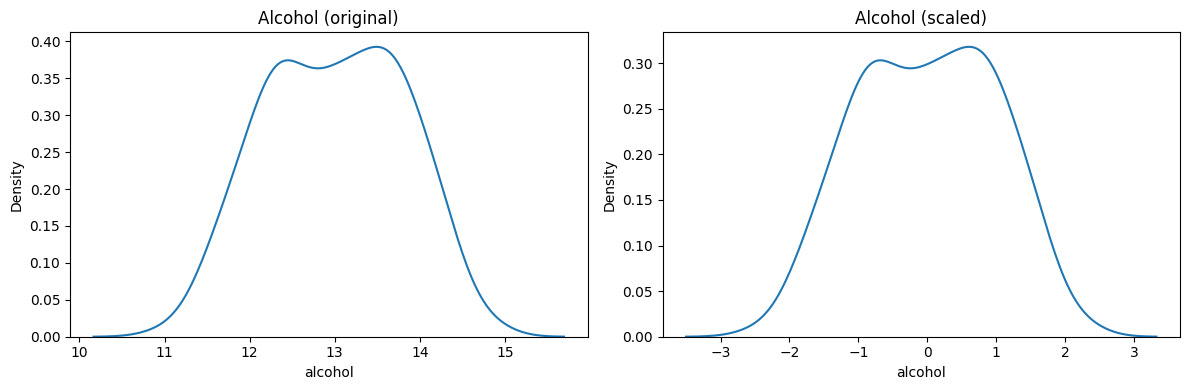

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(X["alcohol"], ax=axes[0])
axes[0].set_title("Alcohol (original)")

sns.kdeplot(X_scaled_df["alcohol"], ax=axes[1])
axes[1].set_title("Alcohol (scaled)")

plt.tight_layout()
plt.show()

In [15]:
from sklearn.decomposition import PCA


In [16]:
pca = PCA(n_components=None)   # or PCA() same thing
pca.fit(X_scaled)

# 2) Get transformed data (principal components)
X_pca = pca.transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA shape:", X_pca.shape)

Original shape: (178, 13)
PCA shape: (178, 13)


In [17]:
explained_var_ratio = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var_ratio)

print("Explained variance ratio per component:")
print(explained_var_ratio)

print("\nCumulative explained variance:")
print(cum_explained_var)

Explained variance ratio per component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative explained variance:
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


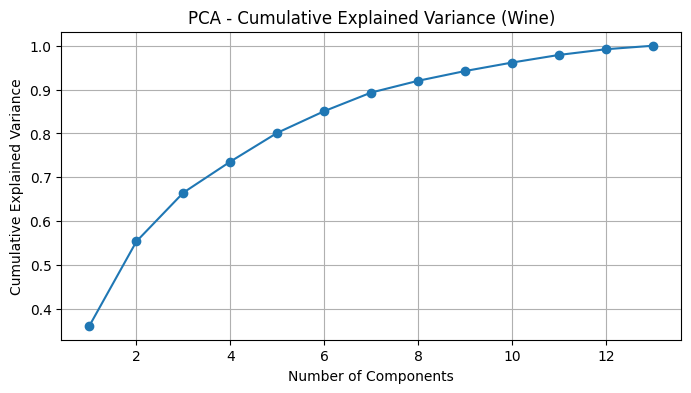

In [18]:
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_var_ratio)+1), cum_explained_var, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance (Wine)")
plt.grid(True)
plt.show()

In [19]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Shape after 2D PCA:", X_pca_2d.shape)
print("Explained variance ratio (2D):", pca_2d.explained_variance_ratio_)
print("Total variance captured in 2D:", pca_2d.explained_variance_ratio_.sum())


Shape after 2D PCA: (178, 2)
Explained variance ratio (2D): [0.36198848 0.1920749 ]
Total variance captured in 2D: 0.5540633835693527


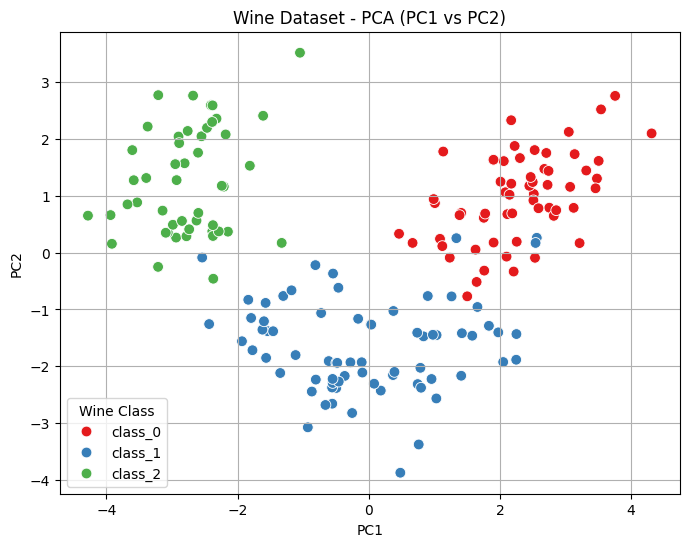

In [20]:
pca_df = pd.DataFrame(
    X_pca_2d, 
    columns=["PC1", "PC2"]
)
pca_df["target"] = y
pca_df["target_name"] = pca_df["target"].map(
    dict(enumerate(target_names))
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="target_name",
    palette="Set1",
    s=60
)
plt.title("Wine Dataset - PCA (PC1 vs PC2)")
plt.legend(title="Wine Class")
plt.grid(True)
plt.show()

In [21]:
loadings = pca_2d.components_          # shape: (2, 13)
loading_df = pd.DataFrame(
    loadings,
    columns=feature_names,
    index=["PC1", "PC2"]
)

print(loading_df.T.sort_values("PC1", key=lambda x: x.abs(), ascending=False).head(10))
print("\nTop features contributing to PC2:")
print(loading_df.T.sort_values("PC2", key=lambda x: x.abs(), ascending=False).head(10))

                                   PC1       PC2
flavanoids                    0.422934 -0.003360
total_phenols                 0.394661  0.065040
od280/od315_of_diluted_wines  0.376167 -0.164496
proanthocyanins               0.313429  0.039302
nonflavanoid_phenols         -0.298533  0.028779
hue                           0.296715 -0.279235
proline                       0.286752  0.364903
malic_acid                   -0.245188  0.224931
alcalinity_of_ash            -0.239320 -0.010591
alcohol                       0.144329  0.483652

Top features contributing to PC2:
                                   PC1       PC2
color_intensity              -0.088617  0.529996
alcohol                       0.144329  0.483652
proline                       0.286752  0.364903
ash                          -0.002051  0.316069
magnesium                     0.141992  0.299634
hue                           0.296715 -0.279235
malic_acid                   -0.245188  0.224931
od280/od315_of_diluted_wines  0.37

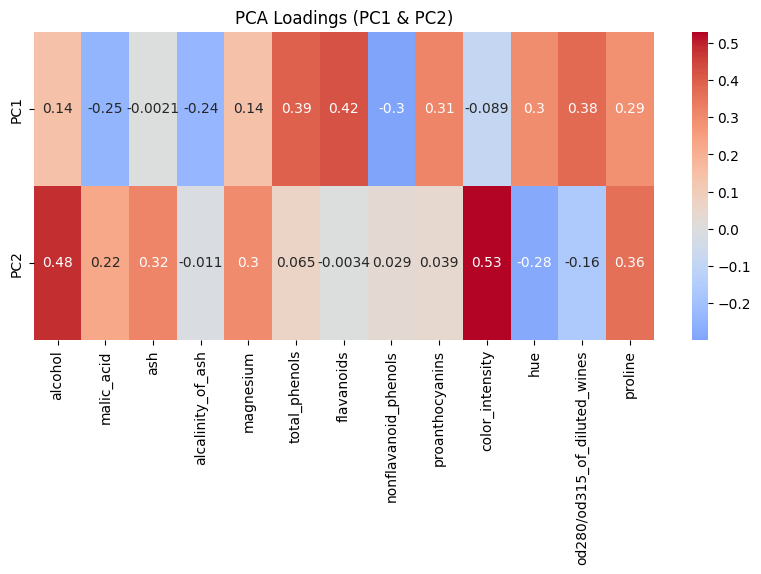

In [22]:
plt.figure(figsize=(10,4))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings (PC1 & PC2)")
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
clf_full = LogisticRegression(max_iter=1000, multi_class="multinomial")
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

In [26]:
pca_for_clf = PCA(n_components=2)
X_train_pca = pca_for_clf.fit_transform(X_train)
X_test_pca = pca_for_clf.transform(X_test)

In [27]:
clf_pca = LogisticRegression(max_iter=1000, multi_class="multinomial")
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

In [28]:
print("Accuracy without PCA:", acc_full)
print("Accuracy with 2D PCA:", acc_pca)
print("Variance captured by 2 PCs:", pca_for_clf.explained_variance_ratio_.sum())

Accuracy without PCA: 0.9722222222222222
Accuracy with 2D PCA: 0.9166666666666666
Variance captured by 2 PCs: 0.5462601439223009


In [29]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# 1. Load data
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# 2. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA (2 components for visualization / simple model)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Simple classifier on top of PCA (optional)
clf = LogisticRegression(max_iter=1000, multi_class="multinomial")
clf.fit(X_pca, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [30]:
model_objects = {
    "scaler": scaler,
    "pca": pca,
    "classifier": clf,
    "feature_names": feature_names,
    "target_names": target_names,
}

with open("wine_pca_model.pkl", "wb") as f:
    pickle.dump(model_objects, f)
